In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')


## Raw Dataset Scraped from prosportstransactions.com

In [2]:
pst_inj_json = '../data/pst_nba_injuries_all.json'
df_injuries_raw = pd.read_json(pst_inj_json)

In [3]:
df_injuries_raw


Date           Team                             Healed  \
0     1899-12-30       Warriors                                      
1     1947-08-05  Bombers (BAA)                                      
2     1948-02-15  Bullets (BAA)  Harry Jeannette / Buddy Jeannette   
3     1949-11-12       Capitols                                      
4     1949-12-23         Knicks                                      
...          ...            ...                                ...   
62238 2021-06-18           Jazz                    Mike Conley Jr.   
62239 2021-06-23          Bucks                                      
62240 2021-06-23          Bucks                       Jordan Nwora   
62241 2021-06-23          Hawks      Cameron Reddish / Cam Reddish   
62242 2021-06-24           Suns                         Chris Paul   

                      Injured  \
0         Willie Cauley-Stein   
1               Jack Underman   
2                               
3                Fred Scolari   
4                Vince Boryla   
...                       ...   
62238                           
62239  Justin Jackson (Aaron)   
62240                           
62241                           
62242                           

                                                   Notes  
0                                          illness (DTD)  
1      fractured legs (in auto accident) (out indefin...  
2                    broken rib (DTD) (date approximate)  
3           fractured right cheekbone (out indefinitely)  
4                                   mumps (out ~2 weeks)  
...                                                  ...  
62238                                  activated from IL  
62239                         sprained right ankle (DTD)  
62240                                  activated from IL  
62241                                  activated from IL  
62242                                  activated from IL  

[62243 rows x 5 columns]

In [181]:
df_injury = pd.read_pickle('../data/df_inj_filtered.pkl')
df_injury

Date          player             Team   Status  \
1597  1994-07-06   Patrick Ewing           Knicks  Injured   
1598  1994-08-16     Brent Price  Bullets/Wizards  Injured   
1599  1994-08-24   Doug Christie           Lakers  Injured   
1600  1994-08-24     John Battle        Cavaliers  Injured   
1601  1994-09-15  LaPhonso Ellis          Nuggets  Injured   
...          ...             ...              ...      ...   
62218 2021-06-06    James Harden             Nets  Injured   
62219 2021-06-07    Jordan Nwora            Bucks  Injured   
62221 2021-06-08     Mike Conley             Jazz  Injured   
62223 2021-06-09     Sam Merrill            Bucks  Injured   
62237 2021-06-16      Chris Paul             Suns  Injured   

                                                   Notes   bbref_id  from  \
1597        arthroscopic surgery on knee (out 6-8 weeks)  ewingpa01  1986   
1598   surgery on knee to repair torn ACL (out for se...  pricebr01  1993   
1599   surgery on left ankle to remove calcium deposi...  chrisdo01  1993   
1600   surgery on left knee to remove loose cartilage...  battljo01  1986   
1601      stress fracture in right kneecap (out 8 weeks)  ellisla01  1993   
...                                                  ...        ...   ...   
62218     placed on IL with tightness in right hamstring  hardeja01  2010   
62219                placed on IL with left thigh injury  nworajo01  2021   
62221         placed on IL with strained right hamstring  conlemi01  2008   
62223             placed on IL with sprained right ankle  merrisa01  2021   
62237               placed on IL with COVID-19 protocols   paulch01  2006   

         to  height  weight  ...  Inj_Loc_Foot  Inj_Type_Soft_Tissue_1  \
1597   2002      84     240  ...             0                       0   
1598   2002      73     165  ...             0                       0   
1599   2007      78     200  ...             0                       0   
1600   1995      74     175  ...             0                       0   
1601   2003      80     240  ...             0                       0   
...     ...     ...     ...  ...           ...                     ...   
62218  2021      77     220  ...             0                       1   
62219  2021      80     225  ...             0                       0   
62221  2021      73     175  ...             0                       0   
62223  2021      76     205  ...             0                       0   
62237  2021      72     175  ...             0                       0   

      Inj_Type_Soft_Tissue_2 Inj_Type_Dislocation  Inj_Type_Concussion  \
1597                       0                    0                    0   
1598                       0                    0                    0   
1599                       0                    0                    0   
1600                       0                    0                    0   
1601                       0                    0                    0   
...                      ...                  ...                  ...   
62218                      0                    0                    0   
62219                      0                    0                    0   
62221                      0                    0                    0   
62223                      0                    0                    0   
62237                      0                    0                    0   

       Inj_Type_Swell  Inj_Type_Sprain_Strain  Inj_Type_Break Inj_Type_Cut  \
1597                0                       0               0            0   
1598                0                       0               1            0   
1599                0                       0               0            0   
1600                0                       0               0            0   
1601                0                       0               1            0   
...               ...                     ...             ...          ...   
62218             

## Formatted Dataset

In [182]:
df = pd.read_pickle('../data/df_inj_filtered.pkl')

df

Date          player             Team   Status  \
1597  1994-07-06   Patrick Ewing           Knicks  Injured   
1598  1994-08-16     Brent Price  Bullets/Wizards  Injured   
1599  1994-08-24   Doug Christie           Lakers  Injured   
1600  1994-08-24     John Battle        Cavaliers  Injured   
1601  1994-09-15  LaPhonso Ellis          Nuggets  Injured   
...          ...             ...              ...      ...   
62218 2021-06-06    James Harden             Nets  Injured   
62219 2021-06-07    Jordan Nwora            Bucks  Injured   
62221 2021-06-08     Mike Conley             Jazz  Injured   
62223 2021-06-09     Sam Merrill            Bucks  Injured   
62237 2021-06-16      Chris Paul             Suns  Injured   

                                                   Notes   bbref_id  from  \
1597        arthroscopic surgery on knee (out 6-8 weeks)  ewingpa01  1986   
1598   surgery on knee to repair torn ACL (out for se...  pricebr01  1993   
1599   surgery on left ankle to remove calcium deposi...  chrisdo01  1993   
1600   surgery on left knee to remove loose cartilage...  battljo01  1986   
1601      stress fracture in right kneecap (out 8 weeks)  ellisla01  1993   
...                                                  ...        ...   ...   
62218     placed on IL with tightness in right hamstring  hardeja01  2010   
62219                placed on IL with left thigh injury  nworajo01  2021   
62221         placed on IL with strained right hamstring  conlemi01  2008   
62223             placed on IL with sprained right ankle  merrisa01  2021   
62237               placed on IL with COVID-19 protocols   paulch01  2006   

         to  height  weight  ...  Inj_Loc_Foot  Inj_Type_Soft_Tissue_1  \
1597   2002      84     240  ...             0                       0   
1598   2002      73     165  ...             0                       0   
1599   2007      78     200  ...             0                       0   
1600   1995      74     175  ...             0                       0   
1601   2003      80     240  ...             0                       0   
...     ...     ...     ...  ...           ...                     ...   
62218  2021      77     220  ...             0                       1   
62219  2021      80     225  ...             0                       0   
62221  2021      73     175  ...             0                       0   
62223  2021      76     205  ...             0                       0   
62237  2021      72     175  ...             0                       0   

      Inj_Type_Soft_Tissue_2 Inj_Type_Dislocation  Inj_Type_Concussion  \
1597                       0                    0                    0   
1598                       0                    0                    0   
1599                       0                    0                    0   
1600                       0                    0                    0   
1601                       0                    0                    0   
...                      ...                  ...                  ...   
62218                      0                    0                    0   
62219                      0                    0                    0   
62221                      0                    0                    0   
62223                      0                    0                    0   
62237                      0                    0                    0   

       Inj_Type_Swell  Inj_Type_Sprain_Strain  Inj_Type_Break Inj_Type_Cut  \
1597                0                       0               0            0   
1598                0                       0               1            0   
1599                0                       0               0            0   
1600                0                       0               0            0   
1601                0                       0               1            0   
...               ...                     ...             ...          ...   
62218             

In [183]:
df['Date'].values[0] - np.timedelta64(7, 'D')

numpy.datetime64('1994-06-29T00:00:00.000000000')

In [184]:
h,w = df[['height',  'weight']].values[-1]
# h, w
{**{'c':4}, **{'a':1}, **{'d':5}, **{}}
# df.count()[0] > 0
type(np.NaN), type(np.NAN), type(np.nan), 

(float, float, float)

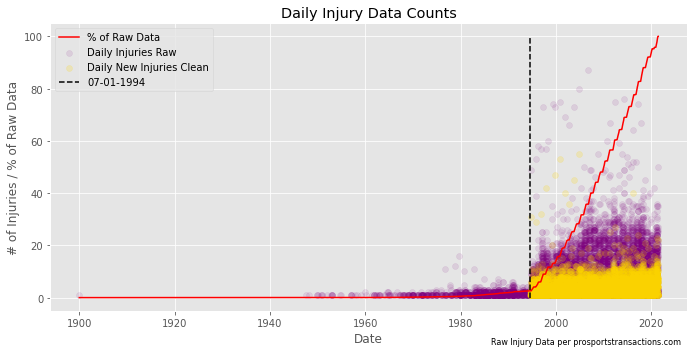

In [185]:
gby_date_count_raw = df_injuries_raw.groupby('Date').count()
gby_date_count = df.groupby('Date').count()
plt.figure(figsize=(10, 5))
plt.scatter(gby_date_count_raw.index, gby_date_count_raw['Team'], alpha=0.1, color='purple', label='Daily Injuries Raw')
plt.scatter(gby_date_count.index, gby_date_count['Team'], alpha=0.2, color='gold', label='Daily New Injuries Clean')
plt.plot(gby_date_count_raw.index, 100*gby_date_count_raw['Team'].cumsum()/len(df_injuries_raw), color='red', label='% of Raw Data')

plt.vlines(pd.Timestamp('1994-07-01'), ymin=0, ymax=100, color='black', ls='--', label='07-01-1994')
plt.title('Daily Injury Data Counts')
plt.legend()
plt.xlabel('Date')
plt.ylabel('# of Injuries / % of Raw Data')
plt.text(x=6000, y=-15, ha='left', va='top', s='Raw Injury Data per prosportstransactions.com', fontsize=8)
plt.tight_layout()
plt.savefig('../img/daily_injury_data_counts.png')
# plt.scatter(df.groupby('Date').count().index, df.groupby('Date').count()['Team'], alpha=0.2)
# plt.plot(df.groupby('Date').count().index, 100*df.groupby('Date').count()['Team'].cumsum()/len(df), color='r')

In [35]:
df.columns

Index(['Date', 'player', 'Team', 'Status', 'Notes', 'bbref_id', 'from', 'to',
       'height', 'weight', 'age', 'Season', 'Return_Date', 'Inj_Duration',
       'New_Inj', 'Out_of_NBA', 'Season_Ending', 'Career', 'days_lst_gm',
       'mp_lst_gm', 'pts_last_game', 'reb_lst_gm', 'ast_lst_gm', 'pm_lst_gm',
       'gms_7d', 't_mp_7d', 't_pm_7d', 'mpg_7d', 'ppg_7d', 'rpg_7d', 'apg_7d',
       'pmg_7d', 'gms_14d', 't_mp_14d', 't_pm_14d', 'mpg_14d', 'ppg_14d',
       'rpg_14d', 'apg_14d', 'pmg_14d', 'gms_30d', 't_mp_30d', 't_pm_30d',
       'mpg_30d', 'ppg_30d', 'rpg_30d', 'apg_30d', 'pmg_30d', 'gms_szn',
       't_mp_szn', 't_pm_szn', 'mpg_szn', 'ppg_szn', 'rpg_szn', 'apg_szn',
       'pmg_szn', 'gms_career_b4', 't_mp_career_b4', 't_pm_career_b4',
       'mpg_career_b4', 'ppg_career_b4', 'rpg_career_b4', 'apg_career_b4',
       'pmg_career_b4', 'League_Years', 'Num_Inj_Career', 'Num_Inj_Season',
       'POS_G', 'POS_F', 'POS_C', 'On_IL', 'Inj_Type_Illness', 'Inj_Type_Rest',
       'Inj_Loc_H

In [34]:
df['Inj_Duration'].value_counts()[:60]

2 days      3428
3 days      1904
4 days      1521
1 days      1036
5 days      1018
6 days       811
7 days       707
8 days       516
9 days       488
10 days      458
11 days      414
12 days      337
14 days      286
13 days      266
15 days      203
17 days      189
16 days      174
18 days      165
21 days      160
20 days      147
19 days      136
22 days      132
23 days      104
25 days      101
24 days       96
28 days       93
27 days       89
26 days       87
36 days       81
29 days       72
35 days       71
30 days       70
32 days       68
31 days       66
34 days       60
38 days       60
41 days       52
44 days       51
40 days       50
33 days       49
39 days       46
37 days       45
196 days      44
46 days       43
42 days       38
198 days      35
45 days       35
203 days      34
43 days       34
52 days       32
197 days      32
47 days       32
49 days       31
48 days       31
51 days       30
53 days       27
50 days       26
205 days      25
200 days      

In [43]:
df[df['Season_Ending'].eq(1)][['Inj_Duration', 'Out_of_NBA', 'Season_Ending']]

Inj_Duration  Out_of_NBA  Season_Ending
1597      121 days           0              1
1611      355 days           0              1
1619      348 days           0              1
1659      339 days           0              1
1697      333 days           0              1
...            ...         ...            ...
59522     139 days           0              1
59541     140 days           0              1
59582     126 days           0              1
59588     143 days           0              1
59593     120 days           0              1

[1258 rows x 3 columns]

In [122]:
def injury_duration_categories(x):
    if x[1] == 1:
        return 'Out Of NBA'
    elif x[2] == 1:
        return 'Season Ending'
    elif x[0].days < 4:
        return 'Few Days'
    elif x[0].days < 7:
        return 'Days'
    elif x[0].days < 14:
        return 'Week'
    elif x[0].days < 60:
        return 'Weeks'
    elif x[0].days < 365:
        return 'Months'
    else:
        return 'More than a year'


(0.0, 365.0)

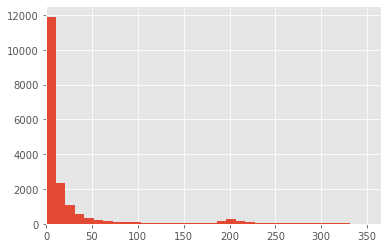

In [163]:
plt.hist(df['Inj_Duration'].dt.days, bins=int(np.sqrt(len(df))))
plt.xlim(0,365)

In [187]:
# df['Inj_Duration_Cat'] = df['Inj_Duration'].apply(lambda x: injury_duration_categories(x), axis=1)
df['Inj_Duration_Cat'] = df[['Inj_Duration', 'Out_of_NBA', 'Season_Ending']].apply(lambda x: injury_duration_categories(x), axis=1)

In [188]:
df.loc[df['Out_of_NBA'].eq(1), :]['Inj_Duration_Cat'] = 'Out of the League'
# df.loc[df['Out_of_NBA'].eq(1), :]['Inj_Duration']

<ipython-input-188-489137a98a0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Out_of_NBA'].eq(1), :]['Inj_Duration_Cat'] = 'Out of the League'


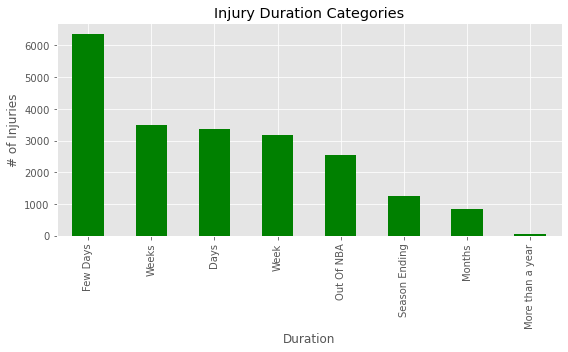

In [207]:
plt.figure(figsize=(8,5))
df['Inj_Duration_Cat'].value_counts().plot(kind='bar', color='green');
plt.title('Injury Duration Categories')
plt.xlabel('Duration')
plt.ylabel('# of Injuries')
plt.tight_layout()
plt.savefig('../img/injury_duration_categories.png')


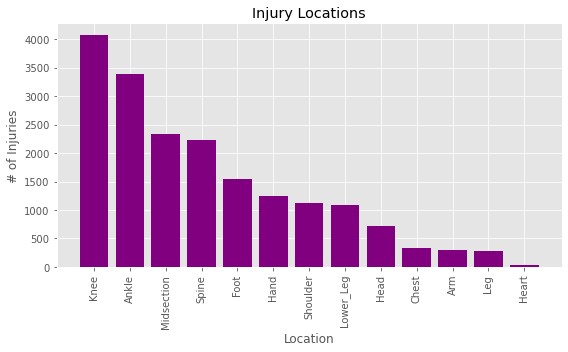

In [208]:
plt.figure(figsize=(8,5))
inj_loc = df[['Inj_Loc_Head', 'Inj_Loc_Spine', 'Inj_Loc_Shoulder', 'Inj_Loc_Arm',
'Inj_Loc_Hand', 'Inj_Loc_Chest', 'Inj_Loc_Heart', 'Inj_Loc_Midsection',
'Inj_Loc_Leg', 'Inj_Loc_Knee', 'Inj_Loc_Lower_Leg', 'Inj_Loc_Ankle',
'Inj_Loc_Foot']].sum().sort_values(ascending=False)
plt.title('Injury Locations')
plt.xlabel('Location')
plt.ylabel('# of Injuries')
inj_loc_labels = [x.replace('Inj_Loc_','') for x in inj_loc.index]
plt.bar(inj_loc_labels, inj_loc.values, color='purple')
plt.xticks(rotation=90);
plt.tight_layout()
plt.savefig('../img/injury_location_categories.png')


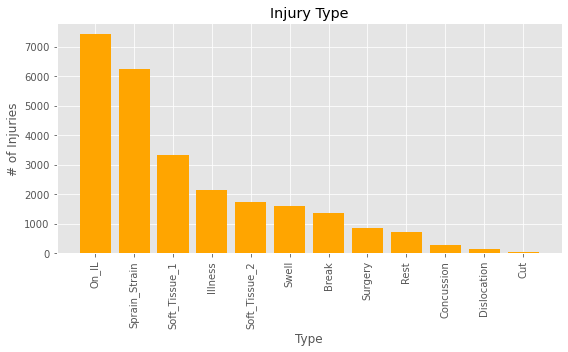

In [213]:
plt.figure(figsize=(8,5))
inj_type = df[['On_IL', 'Inj_Type_Illness', 'Inj_Type_Rest', 
    'Inj_Type_Soft_Tissue_1', 'Inj_Type_Soft_Tissue_2',
    'Inj_Type_Dislocation', 'Inj_Type_Concussion', 'Inj_Type_Swell',
    'Inj_Type_Sprain_Strain', 'Inj_Type_Break', 'Inj_Type_Cut', 'Surgery']].sum().sort_values(ascending=False)
plt.title('Injury Type')
plt.xlabel('Type')
plt.ylabel('# of Injuries')
inj_type_labels = [x.replace('Inj_Type_','') for x in inj_type.index]
plt.bar(inj_type_labels, inj_type.values, color='orange')
plt.xticks(rotation=90);
plt.tight_layout()
plt.savefig('../img/injury_type_categories.png')


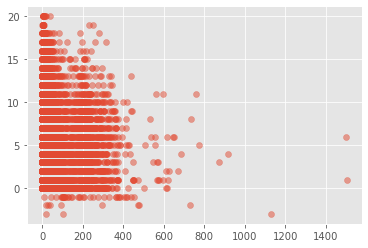

In [168]:
plt.scatter(df['Inj_Duration'].dt.days, df['League_Years'], alpha=0.5)